In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 2.

In this question we will be merging two images in different ways. Write all the functions for grayscale images only.

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale


In [2]:
import math

def merge1(img1, img2):
  '''
  write a program to merge two image such that left half of the output image consists of left half of image 1 and right half of the output image
  consists of right half of image 2. For example ther are two images of 512 x 512 pixel then the output image will have 0 to 255 columns of the first image
  and 256 to 511 columns of the second image

  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''
  no_rows = img1.shape[0]
  no_colms = img1.shape[1]
  
  half_no_colms = math.floor(no_colms/2)
  out_img = np.zeros((no_rows, no_colms), dtype=np.uint8)
  
  for i in range(half_no_colms):
    out_img[:,i] = img1[:,i]

  for i in range(half_no_colms,no_colms):
    out_img[:,i] = img2[:,i]

  return out_img

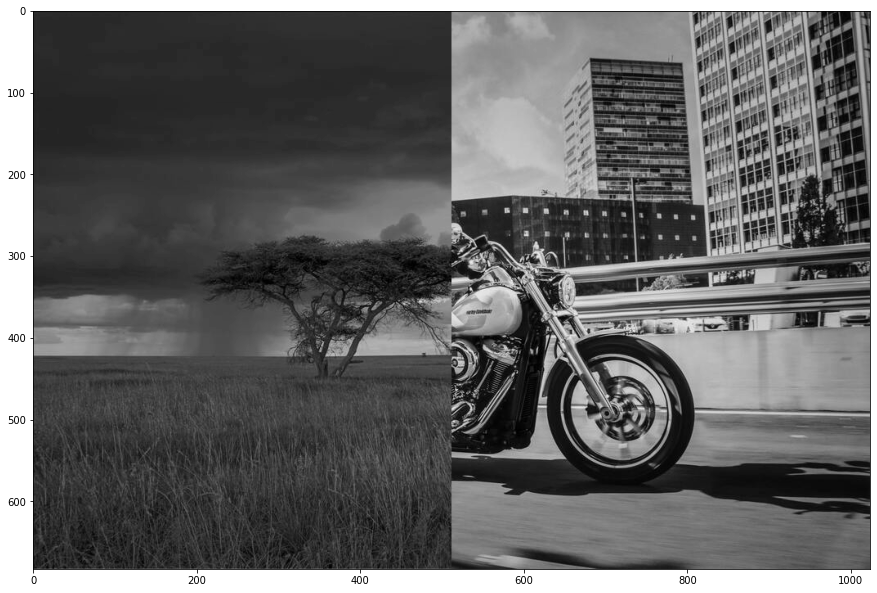

In [33]:
image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale

plt.figure(figsize = (15,15))

im1 = merge1(img1_gray, img2_gray)
plt.imshow(im1,  cmap="gray")

In [29]:
def resize_bilinear(img, k1=1, k2=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    no_rows = math.floor(k1*img.shape[0])
    no_colms = math.floor(k2*img.shape[1])
    out_img = np.zeros((no_rows, no_colms), dtype=np.uint8) # Intialise with blank display 
    for n in range(no_rows):
      for o in range(no_colms):
        frac1 = n/k1
        frac2 = o/k2
        if math.floor(frac1) == frac1 and math.floor(frac2) == frac2:
          out_img[n][o] = img[math.floor(n/k1)][math.floor(o/k2)] 

        if math.floor(frac1) != frac1 and math.floor(frac2) == frac2:
          r1 = frac1 - math.floor(frac1)
          r2 = math.ceil(frac1) - frac1
          out_img[n][o] = r2 * img[math.floor(frac1)][int(frac2)] + r1 * img[math.ceil(frac1)][int(frac2)]

        if math.floor(frac1) == frac1 and math.floor(frac2) != frac2:
          r1 = frac2 - math.floor(frac2)
          r2 = math.ceil(frac2) - frac2
          out_img[n][o] = r2 * img[int(frac1)][math.floor(frac2)] + r1 * img[int(frac1)][math.ceil(frac2)]

        if math.floor(frac1) != frac1 and math.floor(frac2) != frac2:
          r1 = frac1 - math.floor(frac1)
          r2 = math.ceil(frac1) - frac1
          r3 = frac2 - math.floor(frac2)
          r4 = math.ceil(frac2) - frac2
          tmp1 = r4 * img[math.floor(frac1)][math.floor(frac2)] + r3 * img[math.floor(frac1)][math.ceil(frac2)]
          tmp2 = r4 * img[math.ceil(frac1)][math.floor(frac2)] + r3 * img[math.ceil(frac1)][math.ceil(frac2)]
          out_img[n][o] = r2 * tmp1 + r1 * tmp2
    return out_img

def resize_arbitary(img, out_pixels):
  '''
  write a program which resizes the given image into the given pixels

  Inputs:
  - img - original image
  - out_pixels - 2x1 array having out image width and height respectively

  Outputs:
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use cv2.resize or any other externa module.
  '''
  orig_rows = img.shape[0]
  orig_cols = img.shape[1]

  rows = out_pixels[0,0]
  cols = out_pixels[1,0]

  k1 = rows/orig_rows
  k2 = cols/orig_cols

  out_img = resize_bilinear(img, k1, k2)

  return np.uint8(out_img)

In [30]:
def merge2(img1, img2):
  '''
  Using the above function change the size of both images such that the height remains the same and the width is halved for example an 512x512  image 
  should result in an image of size 512x256.
  Then write a program to merge two images such that left half consists of the scaled first image and right half consists of the scaled second image.
  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  rows_1 = img1.shape[0]
  cols_1 = img1.shape[1]
  half_cols_1 = math.floor(cols_1/2)

  rows_2 = img2.shape[0]
  cols_2 = img2.shape[1]
  half_cols_2 = math.floor(cols_2/2)

  out_pixels_1 = np.array([[rows_1],[half_cols_1]])
  out_pixels_2 = np.array([[rows_2],[half_cols_2]])

  img1_resize = resize_arbitary(img1, out_pixels_1)
  img2_resize = resize_arbitary(img2, out_pixels_2)

  out_img = np.hstack((img1_resize, img2_resize))
    
  return np.uint8(out_img)

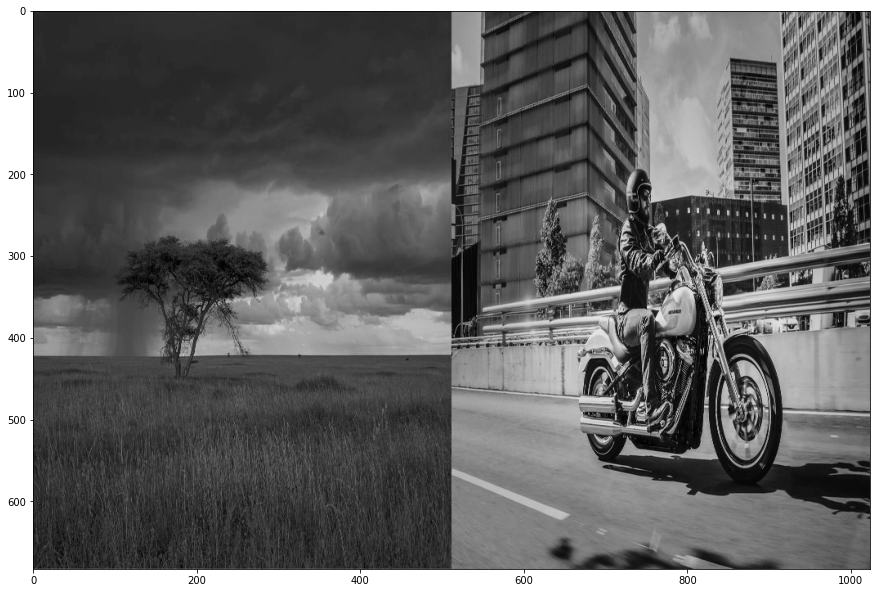

In [38]:
image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale

plt.figure(figsize = (15,15))
im2 = merge2(img1_gray, img2_gray)
plt.imshow(im2,  cmap="gray")

In [14]:
def merge_pip(img1, img2):
  '''
  By using the resize_arbitary function resize the second image by half such that the output width and height is half of the input width and height.
  Then write a program to merge the two images as picture in picture (PiP). the center of the two images should be alligned to each other

  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''
  out_img = img1

  rows_1 = img1.shape[0]
  cols_1 = img1.shape[1]
  
  rows_2 = img2.shape[0]
  cols_2 = img2.shape[1]
  half_rows_2 = math.floor(rows_2/2)
  half_cols_2 = math.floor(cols_2/2)

  out_pixels_2 = np.array([[half_rows_2],[half_cols_2]])

  img2_resize = resize_arbitary(img2, out_pixels_2)  
  
  row_start = math.floor(rows_1/2 - half_rows_2/2)
  row_end = math.floor(rows_1/2 + half_rows_2/2)
  col_start = math.floor(cols_1/2 - half_cols_2/2)
  col_end = math.floor(cols_1/2 + half_cols_2/2)

  for i in range(row_start,row_end):
    for j in range(col_start,col_end):
      out_img[i,j] = img2_resize[i - math.floor(rows_1/2) - math.floor(half_rows_2/2) , j - math.floor(cols_1/2) - math.floor(half_cols_2/2)]

  return np.uint8(out_img)

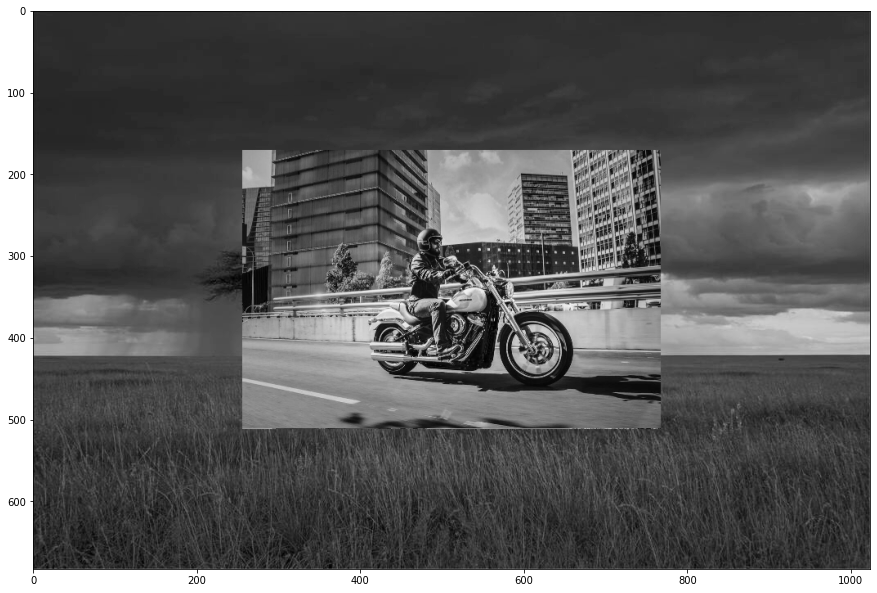

In [39]:
image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale

plt.figure(figsize = (15,15))
im3 = merge_pip(img1_gray, img2_gray)
plt.imshow(im3,  cmap="gray")

In [16]:
def merge_blend(img1, img2):
  '''
  In this function we will blend two images. First resize the second image to half of its original width and height. Then write a program to blend the
  two images. Blending is nothing but adding the corosponding pixel values of the two images. Keep the center of the two images aligned just like the above
  function.

  Inputs:
  - img1 - first image
  - img2 - second image

  Outputs: 
  - out_img - numpy array (of dtype np.uint8) containing the output image.
  
  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  out_img = img1

  rows_1 = img1.shape[0]
  cols_1 = img1.shape[1]
  
  rows_2 = img2.shape[0]
  cols_2 = img2.shape[1]
  half_rows_2 = math.floor(rows_2/2)
  half_cols_2 = math.floor(cols_2/2)

  out_pixels_2 = np.array([[half_rows_2],[half_cols_2]])

  img2_resize = resize_arbitary(img2, out_pixels_2)  
  
  row_start = math.floor(rows_1/2 - half_rows_2/2)
  row_end = math.floor(rows_1/2 + half_rows_2/2)
  col_start = math.floor(cols_1/2 - half_cols_2/2)
  col_end = math.floor(cols_1/2 + half_cols_2/2)

  for i in range(row_start,row_end):
    for j in range(col_start,col_end):
      out_img[i,j] += img2_resize[i - math.floor(rows_1/2) - math.floor(half_rows_2/2) , j - math.floor(cols_1/2) - math.floor(half_cols_2/2)]
  
    
  return np.uint8(out_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars


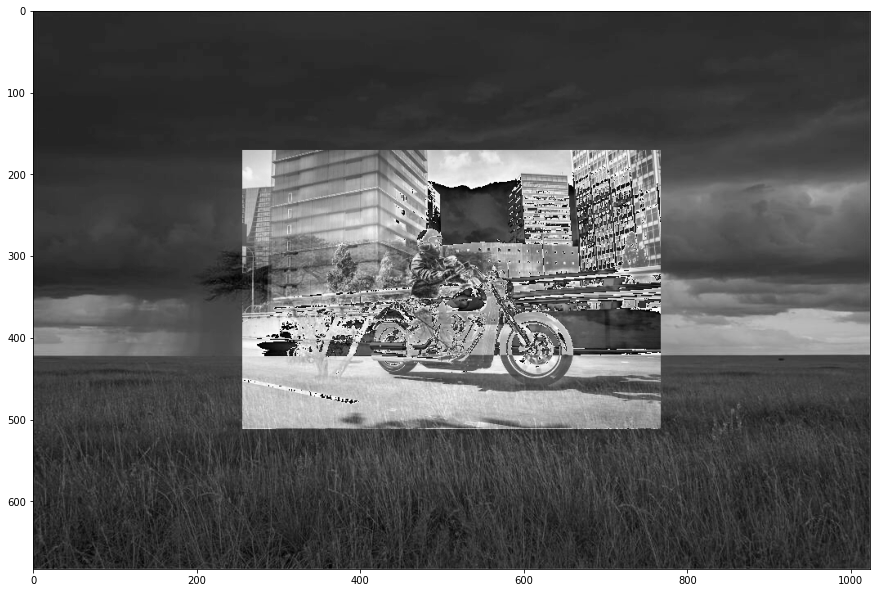

In [40]:
image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale

plt.figure(figsize = (15,15))
im4 = merge_blend(img1_gray, img2_gray)
plt.imshow(im4,  cmap="gray")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in ubyte_scalars


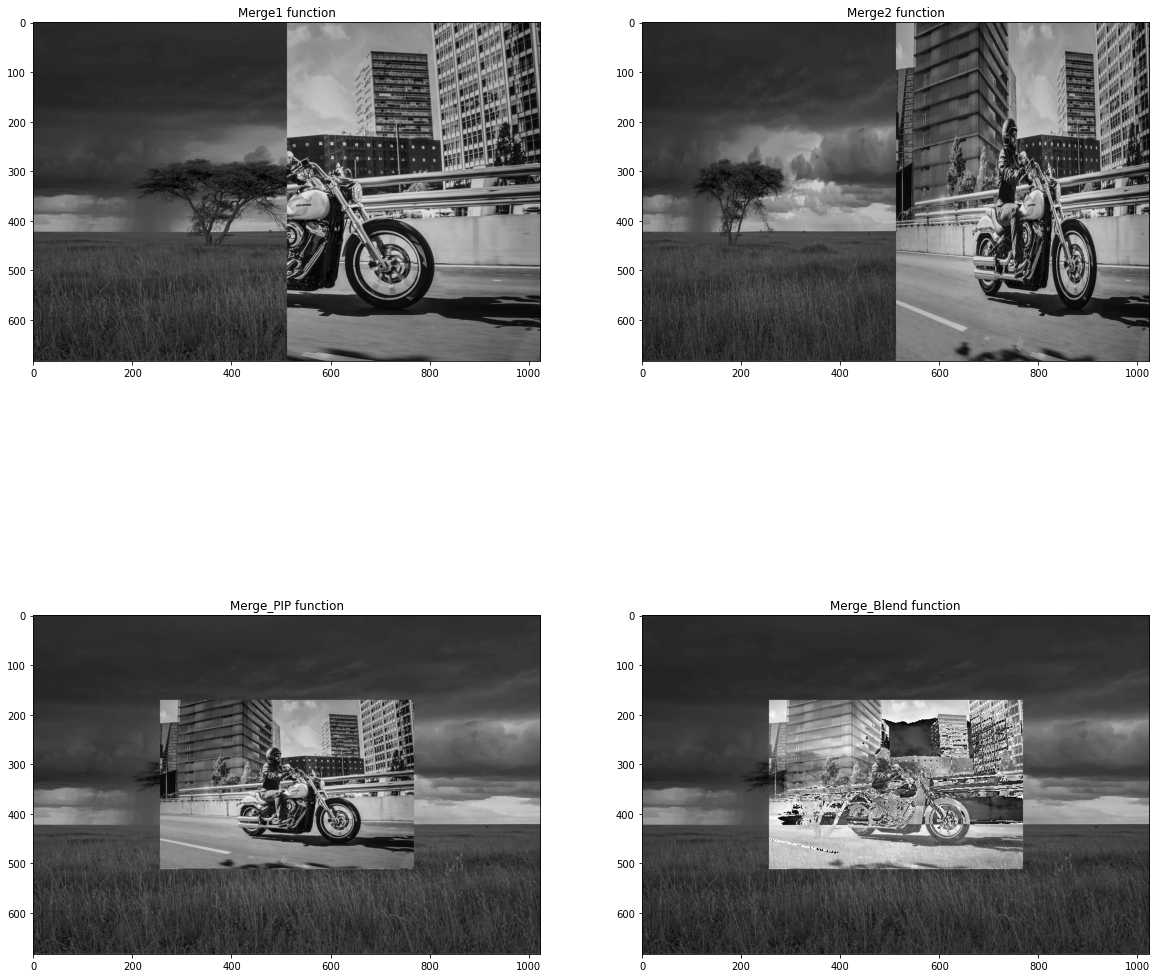

In [37]:
image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale

plt.figure(figsize = (20,20))


im1 = merge1(img1_gray, img2_gray)
plt.subplot(2, 2, 1,).set_title("Merge1 function")
plt.imshow(im1,  cmap="gray")

image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale
im2 = merge2(img1_gray, img2_gray)
plt.subplot(2, 2, 2).set_title("Merge2 function")
plt.imshow(im2, cmap="gray")

image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale
im3 = merge_pip(img1_gray, img2_gray)
plt.subplot(2, 2, 3).set_title("Merge_PIP function")
plt.imshow(im3, cmap="gray")

image1 = cv2.imread('q2im1.jpg')
image2 = cv2.imread('q2im2.jpg')
img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) # convert to greyscale
img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # convert to greyscale
im4 = merge_blend(img1_gray, img2_gray)
plt.subplot(2, 2, 4).set_title("Merge_Blend function")
plt.imshow(im4, cmap="gray")



